# **Random Forest**

In [379]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import useful functions for the random forest algorithm
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Import DBSCAN
from sklearn.cluster import DBSCAN

# Import PCA
from sklearn.decomposition import PCA

# Import K-Means
from sklearn.cluster import KMeans

In [380]:
from google.colab import drive # Import the drive function from the google.colab module
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div align = "justify">

## **Step 1:** Data preparation

The dataset was obtain from the UC Irvine Machine Learning Repository, particularly from the processed.cleveland.data file.

[Heart Disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

</div>

In [381]:
# Load data
df_cleveland = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence/Supervised and unsupervised learning/processed.cleveland.data',
                           header = None)
df_cleveland.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [382]:
# Declare the name of each attribute
columns_names = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "target"  # Target variable
}

In [383]:
# Change the name of the future for enhancing interpretability
df_cleveland.rename(columns=columns_names, inplace=True) # 'inplace=True' changes the columns in the current dataframe
df_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [384]:
# There are 6 occurrences of '?' values
print("Number of missing values: ", (df_cleveland == '?').sum().sum())

# Replace '?' with NaN
df_cleveland.replace('?', np.nan, inplace=True)
# Drop those columns that have nan
df_cleveland.dropna(inplace=True)

Number of missing values:  6


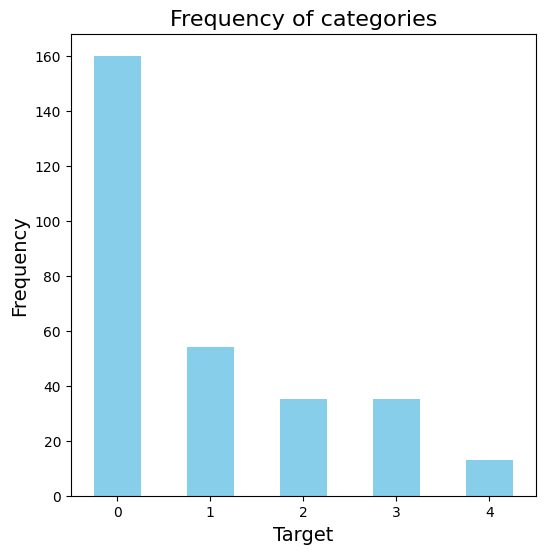

In [401]:
# Count occurrences of each category in 'target'
target_counts = df_cleveland["target"].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 6))
target_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Frequency of categories', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
# Show the plot
plt.show()

<div align = "justify">

## **Step 2:** Use unsupervised algorithms

Below will be used PCA and DBSCAN to allow a bettter performance of the random forest classifier.

</div>

In [386]:
pca_heart = PCA(n_components=2) # Return the first two principal components
prin_comp_heart = pca_heart.fit_transform(df_cleveland.iloc[:,:-1])
#https://www.datacamp.com/tutorial/principal-component-analysis-in-python

In [387]:
df_pca_heart = pd.DataFrame(data=prin_comp_heart,
                            columns=["Principal component 1", "Principal component 2"])
df_pca_heart["Target"] = df_cleveland.iloc[:,-1] # Add the target variable or 'y' (the class each row belongs to)
df_pca_heart.head()

,Principal component 1,Principal component 2,Target
0,-13.325147,-2.924464,0.0
1,40.575214,-45.572540,2.0
2,-18.401154,-21.404449,1.0
3,1.829988,39.912295,0.0
4,-43.894744,23.941741,0.0


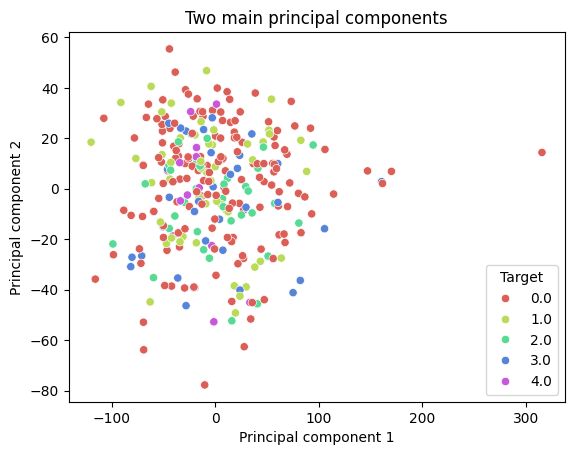

In [388]:
# Make the scatterplot
sns.scatterplot(
    x = "Principal component 1",
    y = "Principal component 2",
    hue = "Target", # Add a legend regarding the 'target' variable
    palette = sns.color_palette('hls',5),
    data = df_pca_heart,
    legend = "full"
    #alpha = 0
)
plt.title("Two main principal components") # Add the title
plt.show() # Show the scatterplot

# There seem not to have some defined clusters

In [389]:
# Extract the important columns to process the dataframe
X_features = df_cleveland.iloc[:, :-1]
y_labels = df_cleveland.iloc[:, -1]

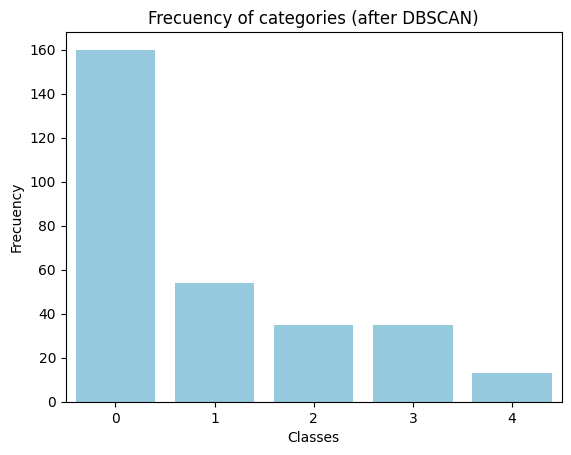

In [390]:
# Check the class imbalance
#sns.histplot(y_labels_dbscan, discrete=True)
#sns.set_palette(sns.color_palette("hls", 5))
# sns.set_style(None)

# Get the clases and the numer per class
unique_elements, counts = np.unique(y_labels, return_counts=True)
sns.barplot(x=unique_elements, y=counts, color="skyblue")
plt.title("Frecuency of categories (after DBSCAN)")
plt.xlabel("Classes")
plt.ylabel("Frecuency")
plt.show()

<div align ="justify">

### Apply K-Means
</div>

In [391]:
# Compute the k nearest neighbors
kmeans_heart = KMeans(n_clusters=4)
clusters = kmeans_heart.fit_predict(X_features)

# Add the cluster column that shows the cluster of each point belongs to
df_cleveland["k-means"] = clusters

# Exctract the important features with the 'k-means' column added
X_features = df_cleveland.loc[:, df_cleveland.columns != "target"]
y_labels = df_cleveland.loc[:, "target"]

In [392]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2)

In [393]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42, k_neighbors=4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

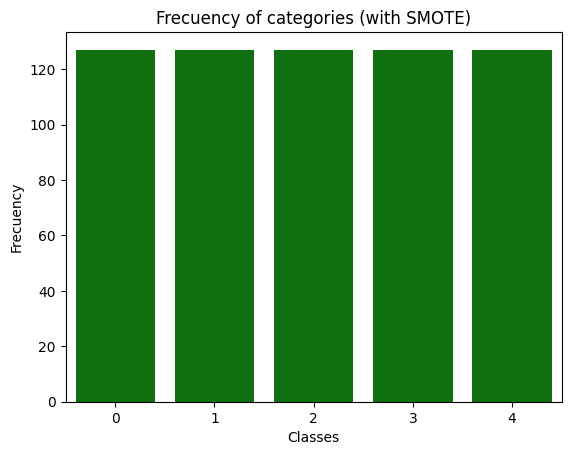

In [394]:
# Show the number of elements of each class
# Get the clases and the numer per class
unique_elements_resamp, counts_resamp = np.unique(y_train_resampled, return_counts=True)
sns.barplot(x=unique_elements_resamp, y=counts_resamp, color="green")
plt.title("Frecuency of categories (with SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frecuency")
plt.show()

<div align = "justify">

## **Step 2:** Random Forest classifier

The Random Forest classifier model is created below.

</div>

In [395]:
classifier_cleveland = RandomForestClassifier(n_estimators=100, # How many decision trees will be created
                                              max_depth=2,# Depth of the tree
                                              class_weight='balanced',
                                              )
classifier_cleveland.fit(X_train_resampled, y_train_resampled) # Train the model

# Predict with the test dataset
y_pred = classifier_cleveland.predict(X_test)

<div align = "justify">

## **Step 3:** Model evaluation
</div>

In [396]:
accuracy = accuracy_score(y_test, y_pred)
cleveland_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy} \n")
print(f"CLASSIFICATION REPORT: \n\n {cleveland_report}")

Accuracy: 0.6333333333333333 

CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.73      0.97      0.83        33
           1       0.50      0.14      0.22        14
           2       0.33      0.33      0.33         3
           3       0.17      0.25      0.20         4
           4       0.67      0.33      0.44         6

    accuracy                           0.63        60
   macro avg       0.48      0.41      0.41        60
weighted avg       0.61      0.63      0.58        60



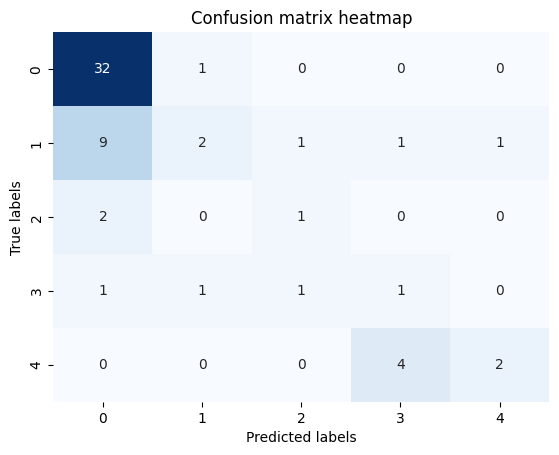

In [397]:
# Creeate confusion matrix for visualizing correct predictions
conf_matrix = confusion_matrix(y_test, y_pred)

#plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=sorted(df_cleveland["target"].unique()),
            yticklabels=sorted(df_cleveland["target"].unique()))

plt.title('Confusion matrix heatmap')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

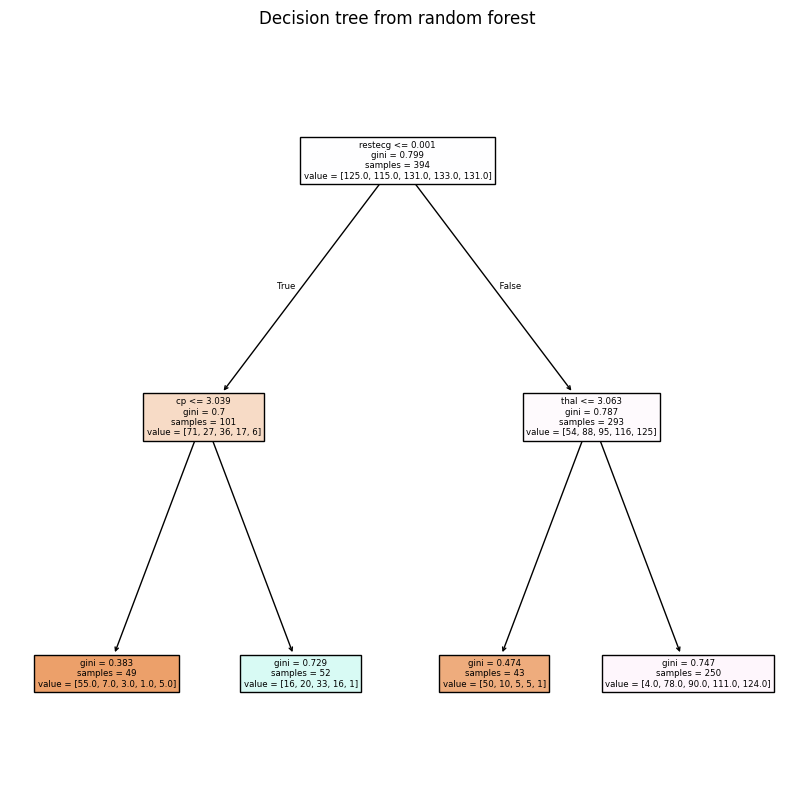

In [398]:
# Visualize a single decision tree from the random forest
plt.figure(figsize=(10, 10))

# Extract the first tree (we can select a different tree by changing the index)
tree.plot_tree(classifier_cleveland.estimators_[0],
               feature_names=df_cleveland.columns,
               filled=True)

plt.title('Decision tree from random forest')
plt.show()

<div align = "justify">

By implementing the **K-Means algorithm**, we introduced additional information into the dataset by assigning each observation to a cluster based on feature similarity. This clustering approach helped group similar data points together, which slightly improved the performance of the Random Forest model. However, **Principal Component Analysis (PCA)** revealed that the data points are dispersed across the feature space, suggesting that the clustering structure may not be strongly defined.

The **DBSCAN algorithm** was also tested, but it did not provide significant benefits, since there were not many outliers that could be affecting the model.

In addition, **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to address class imbalance. Histograms indicated that there was a majority class of patients that do not have a heart disease.

Overall, when compared to the baseline model without clustering, a slight improvement in performance was observed. Neverthelss, it could be better to modify the **Random Forest** algorithm by adding more trees or increasing the their maximum depth.

</div>